In [138]:
from hanziconv import HanziConv
import jieba
import codecs
import re
import string
import pandas as pd

In [176]:
dataset = pd.read_csv('all_videos.csv')

f = open('title_all.txt','r')
text = f.readlines()
f.close()
print("Done")



Done


In [196]:
## Sentences to words 
df1 = dataset.iloc[:, 11]
df2 = dataset.iloc[:, 12]
df3 = dataset.iloc[:, 14] + 13
data = pd.concat([df1, df2, df3], axis=1, join_axes=[df1.index])

jieba.load_userdict('user_dict.txt')
words_dict={"initial":[0, 0, 0]} # Appear Times, Total Video Views, Average

for i in range(0, data.shape[0]): #data.shape[0]
    if data.iloc[i]['Video_exist_day'] <= 50:
        continue
    
    if (i%5000) == 0:
        print(i)
    
    text = data.iloc[i]['Title']
    sen = HanziConv.toSimplified(text)
    #print(sen)
    
    sen = re.sub(r'[^\w\s]',' ',sen)
    sen = sen.lower()
    for num in range(0, 10):
        sen = sen.replace(str(num), "")
        
    #print(sen)
    
    seg_list = jieba.cut(sen, cut_all=False)
    seg_list_new = []
    for seg in seg_list:
        seg = seg.replace(" ", "")
        seg = seg.replace("\n", "")
        if len(seg) != 0:
            if seg in words_dict:
                value = words_dict[seg]
                value[0] += 1
                value[1] += data.iloc[i]['Views']
                value[2] = value[1]/value[0]
                words_dict[seg] = value
            else:    
                value = [1,  data.iloc[i]['Views'], data.iloc[i]['Views']]
                words_dict[seg] = value   

print("Done")


5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
Done


In [191]:
data

,Title,Views,Video_exist_day
0,這群人 TGOP │倒帶2018流行事 The Best Memes of 2018,1919547,9
1,這群人 TGOP │金傢好髮廊 Part 2【偽八點檔預告片】Kings Hair Salo...,1286906,24
2,這群人 TGOP │金傢好髮廊 Part 1【偽八點檔預告片】Kings Hair Salo...,1933994,39
3,這群人 TGOP │ 最廢一日系列 feat.木曜4超玩 The Worst Episod...,2085312,54
4,這群人 TGOP │租屋教戰守則 An Ultimate Guide To Renting,2446919,70
5,這群人 TGOP │生活中各種哥跟姐 All Kinds of Friends in Life,2449455,85
6,這群人 TGOP │如果宮廷劇發生在現實生活中 Period Dramas in Real ...,3301077,100
7,這群人 TGOP │當來不及的那些時刻 Those Too-Late Moments,2472859,115
8,這群人 TGOP │電影的情節在現實生活發生會怎麼樣 Movies vs. Reality,2217709,131
9,這群人 TGOP │在生活中遇到各種解High達人 Typical Party Pooper...,2391253,146


/home/tony/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


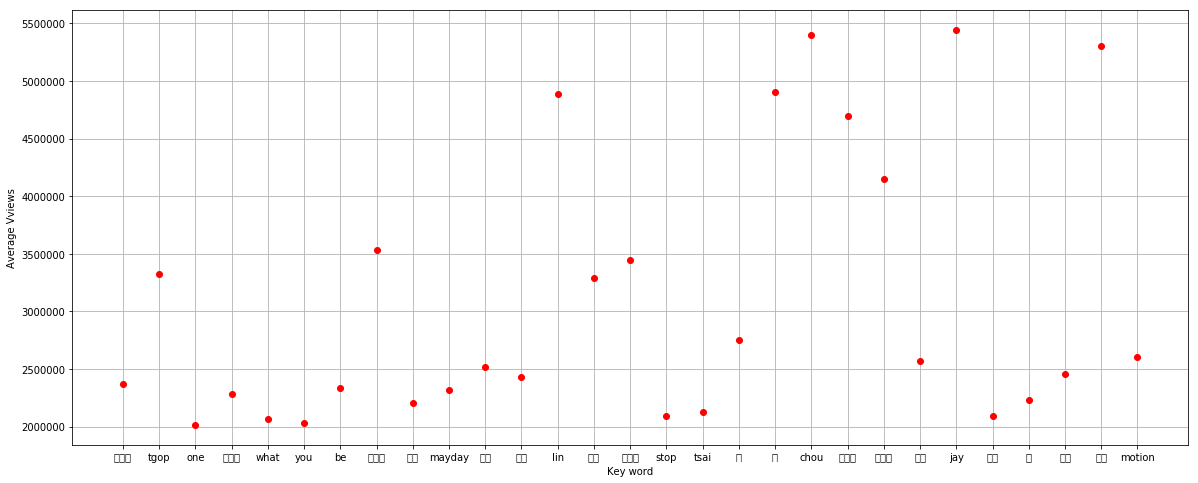

In [250]:
import matplotlib.pyplot as plt 
import matplotlib as  mpl
from matplotlib.font_manager import FontProperties
x = []
y = []

plt.rcParams['font.sans-serif'] = [u'SimHei'] 

for element in words_dict:
    #print(element)
    if words_dict[element][0] >= 100 and words_dict[element][2] >= 2000000:
        #print(element, end='')
        #print(words_dict[element])
        x.append(element)
        y.append(words_dict[element][2])
        
plt.figure(figsize=(20, 8),)
myfont = FontProperties(fname=r'simhei.ttf')
plt.plot(x, y, 'ro') 
plt.xlabel('Key word')
plt.ylabel('Average Vviews')
plt.grid()
plt.show()


## Test Area

In [117]:
## Sentences to words 

jieba.load_userdict('user_dict.txt') 

all_words = []
file = open("seg_word.txt", 'w+')

print(len(text))
for i in range(0, len(text)):
    if (i%5000) == 0:
        print(i)
    sen = HanziConv.toSimplified(text[i])
    #print(sen)
    
    sen = re.sub(r'[^\w\s]',' ',sen)
    sen = sen.lower()
    for num in range(0, 10):
        sen = sen.replace(str(num), "")
        
    #print(sen)
    
    seg_list = jieba.cut(sen, cut_all=False)
    for seg in seg_list:
        seg = seg.replace(" ", "")
        seg = seg.replace("\n", "")
        if len(seg) != 0:
            all_words.append(seg)
            file.write(seg + ' ')
    file.write('\n')
               
file.close()
print("Done")

162389
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
Done


In [252]:
from gensim.models import word2vec

'''
df = pd.read_fwf('seg_word.txt', header=None)
df = df.iloc[:, 0]
df
'''

sentences = word2vec.LineSentence("seg_word.txt")

model = word2vec.Word2Vec(sentences, size=500, window=5, workers=6, min_count=10)
model.save("seg_word.model")

print(len(model.wv.vocab))
'''
for element in model.wv.vocab:
    print(element)
'''

print("Done")

17355
Done


In [253]:
model = word2vec.Word2Vec.load("seg_word.model")
res = model.most_similar('jolin',topn = 30)

for item in res:
    print(item[0]+","+str(item[1]))

蔡依林,0.948519229888916
tsai,0.9324334859848022
家家,0.868241548538208
jiajia,0.8495391607284546
wen,0.8487108945846558
曾静玟,0.8341442346572876
吴汶芳,0.8340672254562378
我爱你,0.8260563015937805
王力宏,0.817707896232605
鼓鼓,0.8162940144538879
李威,0.8143734931945801
chang,0.8129469156265259
tseng,0.8126224279403687
wei,0.8125699758529663
王诗安,0.8121143579483032
wu,0.8097519874572754
蔡佩轩,0.8072322010993958
wan,0.8055272102355957
刘若英,0.8055209517478943
万芳,0.8046153783798218
fan,0.8043391108512878
曾沛慈,0.8040652275085449
二重唱,0.8027076721191406
李千娜,0.802151620388031
leehom,0.8018858432769775
yin,0.7999125123023987
jing,0.7989023923873901
恋习,0.798572301864624
diana,0.7941901683807373
张洪量,0.7931132316589355


/home/tony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/home/tony/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [168]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [170]:
word_vectors = model.wv
X_reduced = PCA(n_components=2).fit_transform(word_vectors)

ValueError: setting an array element with a sequence.